# Лаба 1

In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [113]:
f = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2]) 
Q = np.array([1, 1, 0.01, 1, 0.01])
# xi = [-1, 1], i = 1, 2

In [114]:
u = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + x2**2 + 1

Text(0.5, 0, 'U')

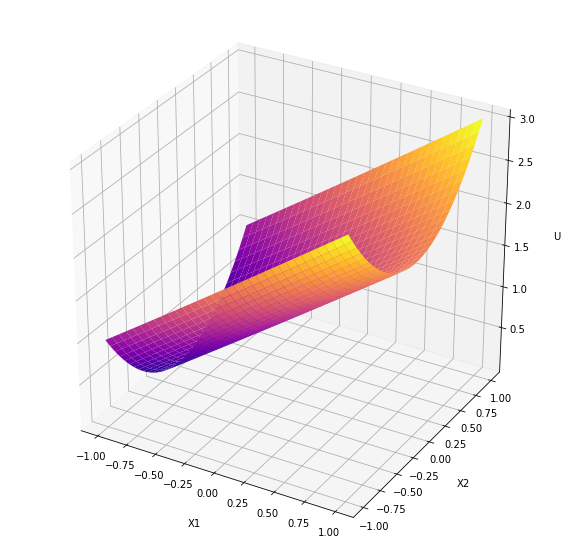

In [115]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
x1_val = np.linspace(-1, 1, 100)
x2_val = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1_val, x2_val)
z = u(x1, x2)

surf = ax.plot_surface(x1, x2, z, rstride = 3, cstride = 3, cmap = cm.plasma)
ax.set_xlabel('X1', labelpad = 15)
ax.set_ylabel('X2', labelpad = 15)
ax.set_zlabel('U', labelpad = 15)

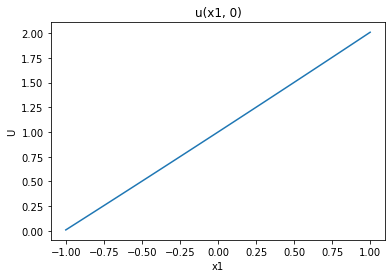

In [116]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)
plt.plot(x, u(x, 0))
plt.title('u(x1, 0)')
plt.xlabel('x1')
plt.ylabel('U')
plt.show()

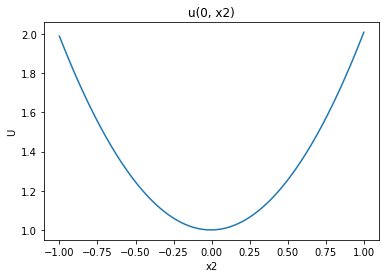

In [117]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)
plt.plot(x, u(0, x))
plt.title('u(0, x2)')
plt.xlabel('x2')
plt.ylabel('U')
plt.show()

# Генерация данных

In [118]:
import random

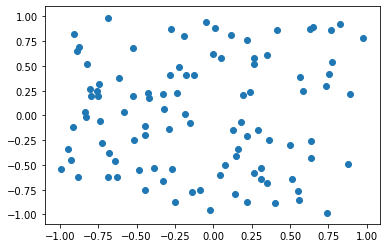

In [119]:
#генерим 100 точек
x = []
y = []
for i in range(100):
    x.append(random.uniform(-1,1))
    y.append(random.uniform(-1,1))

fig = plt.subplots()


plt.scatter(x, y)
plt.show()

In [220]:
import pandas as pd
df = pd.DataFrame(columns = ["i", "x1", "x2", "u", "y", "y-y`"])
for i in range(len(x)):
    df.loc[i] = [i, x[i], y[i], u(x[i], y[i]),0,0]


In [221]:
vec_u = np.array(df.u)

In [222]:
df

,i,x1,x2,u,y,y-y`
0,0.0,-1.000000,0.018024,-0.007519,0.0,0.0
1,1.0,-0.979798,0.694310,-0.161472,0.0,0.0
2,2.0,-0.959596,0.947515,0.047640,0.0,0.0
3,3.0,-0.939394,-0.884025,1.672538,0.0,0.0
4,4.0,-0.919192,-0.150371,0.248584,0.0,0.0
...,...,...,...,...,...,...
95,95.0,0.919192,0.249494,2.221716,0.0,0.0
96,96.0,0.939394,-0.136466,1.837282,0.0,0.0
97,97.0,0.959596,-0.869729,1.881947,0.0,0.0
98,98.0,0.979798,-0.869972,1.885153,0.0,0.0


In [239]:
mean = vec_u.mean()
w2 = np.dot(vec_u - mean, vec_u - mean)/(len(vec_u) - 1)

In [249]:
w2

0.4920460174079506

In [270]:
p = 0.1
sigma = (p*w2)**0.5
sigma

0.22182110301050048

In [269]:
sigma**2

0.049204601740795065

# Лаба 2

## Неизвестная случайная ошибка

In [271]:
import scipy
from scipy import optimize
import math

In [323]:
def l2(sigma, f, Q, u):
    mean = df.y.mean()
    w2 = np.dot(vec_u - mean, vec_u - mean)/(len(vec_u) - 1)
    p = 0.1
    sigma = (p*w2)**0.5
    sigma
    for i in range(len(df['u'])):
        df['u'][i] = u(df['x1'][i], df['x2'][i])
    def ff(x,u):
        return -u(x[0],x[1])
    bnds = ((-1,1), (-1, 1))
    maxx = scipy.optimize.minimize(ff, [0, 0] ,u, method='SLSQP', bounds=bnds)
    maxx = -maxx.fun
    y = []
    for i in range(len(df['u'])):
        y.append(df["u"][i] + random.uniform(-1,1)*0.05*maxx )
        df['y'][i] = y[i]
        df['y-y`'][i] = df.y[i]-df.u[i]
        
    X = []
    for i in range(len(Q)):
        X.append([])
        for j in range(len(df['u'])):
            X[i].append(f(df['x1'][j],df['x2'][j])[i])
    X = np.matrix(X)
    Q1 = X.dot(X.T)
    Q1 = np.linalg.inv(Q1)
    Q1 = Q1.dot(X)
    Q1 = Q1 * np.matrix(y).T
    e = []
    e = y - (X.T).dot(np.matrix(Q).T).T
    sigma2 = float(e.dot(e.T)/(len(df["u"])-len(Q)))
    F = sigma2/sigma**2
    print(sigma**2)
    return Q1, sigma2, F, X 

In [318]:
l2(sigma,f,Q,u)
df.to_excel("output.xlsx")

0.22182110301050048


# Лаба 3

#### 1) Изменить модель регрессии, добавив в неё дополнительный регрессор, ранее не вошедший в состав модели, порождающей данные. Не генерируя новых данных, найти точечные оценки всех параметров расширенной модели. В дальнейшем при рассмотрении этой расширенной модели анализе должно быть показано, что параметр при дополнительном регрессоре незначим.

In [387]:
import numpy as np

In [388]:
f_old = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2]) 
Q_old = np.array([1, 1, 0.01, 1, 0.01])

# Добавим доп регрессор x1*x2
f = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2, x1 * x2]) 
Q = np.array([1, 1, 0.01, 1, 0.01, 1])
u_old = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + x2**2 + 1
u = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + x2**2 + x1 * x2 + 1

In [389]:
#Оценки старой модели: 
QT_old, sigma2_old, F_old, X_old = l2(sigma,f_old,Q_old, u_old)
print(QT_old, sigma2_old, F_old)

0.049204601740795065
[[1.00637799]
 [1.01445987]
 [0.00135167]
 [0.98689086]
 [0.04738778]] 0.00763913897032529 0.155252531268671


In [390]:
#Оценки новой модели:
QT, sigma2, F, X = l2(sigma,f,Q,u)
print(QT, sigma2, F)
X.shape

0.049522321001413884
[[ 1.01503082]
 [ 0.98353263]
 [-0.04469292]
 [ 1.02808745]
 [-0.00533639]
 [ 0.98367553]] 0.01292474949162241 0.26098836303034756


(6, 100)

#### 2) Построить доверительные интервалы для каждого параметра модели регрессии.

In [391]:
#n=100 m=6 квантиль распределение Стьюдента = 1.9850
t=1.950

In [392]:
djj=np.diagonal(np.linalg.inv((X.dot(X.T))))
sigma_Qj = np.diagonal(sigma2*np.linalg.inv((X.dot(X.T))))**0.5

Qmin = QT-t*np.matrix(sigma_Qj).T
Qmax = QT+t*np.matrix(sigma_Qj).T
print(Qmin)
print()
print(Q)
print(QT)
print()
print(Qmax)

[[ 0.97394846]
 [ 0.94480376]
 [-0.11970909]
 [ 0.94559626]
 [-0.04598454]
 [ 0.91242933]]

[1.   1.   0.01 1.   0.01 1.  ]
[[ 1.01503082]
 [ 0.98353263]
 [-0.04469292]
 [ 1.02808745]
 [-0.00533639]
 [ 0.98367553]]

[[1.05611317]
 [1.0222615 ]
 [0.03032325]
 [1.11057864]
 [0.03531176]
 [1.05492173]]


In [393]:
flag = 1
for i in range(len(Q)):
    if Q[i]<Qmax[i][0] and Q[i]>Qmin[i][0] and QT[i][0]<Qmax[i][0] and QT[i][0]>Qmin[i][0]:
        flag*=1
    else:
        flag=0
    print(flag)

1
1
1
1
1
1


In [394]:
Qmax.shape

(6, 1)

#### 3) Проверить гипотезу о незначимости каждого параметра модели.

In [395]:
#F(1,94) ~ 3.92 вроде бы

In [396]:
F=[]
for j in range(len(Q)):
    F.append(float(QT[j][0])**2/(sigma2*djj[j]))
    if F[j]<3.92:
        print('Принимается')
    else:
        print('Отвергается')
print(F)

Отвергается
Отвергается
Принимается
Отвергается
Принимается
Отвергается
[2321.2238650827176, 2452.3196524252644, 1.3496989390554488, 590.6282180118362, 0.06553642829985797, 724.8523285736654]


#### 4)  Проверить гипотезу о значимости самой регрессии.

In [397]:
RSS=(np.array(df.y)-X.T.dot(QT).T)
RSS=float(RSS.dot(RSS.T))
print(RSS)
RSSh=0
for i in range(len(df.y)):
    #RSSh+=(df.y[i]-df.u[i])**2
    RSSh+=(df.y[i]-np.mean(df.u))**2
print(RSSh)
m=6
n=100
q=m-1
F=((RSSh-RSS)/q)/(RSS/(n-m))
print(F)

1.1681404093825043
49.16211444676549
772.4128920253361


In [398]:
#F=278 > F(5,94) = 2.2899
#Гипотеза о незначимости регрессии отвергается

#### 5)  Рассчитать прогнозные значения для математического ожидания функции отклика для всего интервала действия одного из факторов, зафиксировав значения других факторов на границе или в центре области их определения.

In [399]:
sigma_nu = lambda x1, x2 : sigma2*float(f(x1,x2).dot(np.linalg.inv(X.dot(X.T)).dot(np.matrix(f(x1,x2)).T)))**0.5

In [400]:
def sigma_nu (x1, x2) : 
    return sigma2*np.array(f(x1,x2)*np.linalg.inv(X.dot(X.T))*np.matrix(f(x1,x2)).T)

In [401]:
nu = lambda x1, x2, Q : sum(np.array([1*Q[0], x1*Q[1], x1**2*Q[2], x2**2*Q[3], x2*Q[4], x1 * x2*Q[5]]))
nu_min = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) - t*(sigma_nu(x1,x2)[0][0]))
nu_max = lambda x1, x2, Q : np.float64(nu(x1,x2,Q) + t*(sigma_nu(x1,x2)[0][0]))

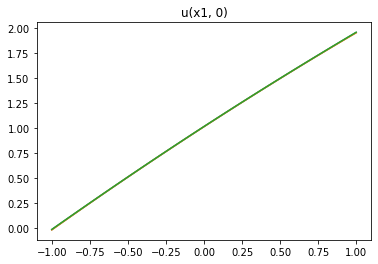

In [402]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)

plt.plot(x, nu(x, 0,np.array(QT)))
plt.plot(x, nu_min(x, 0,np.array(QT)))
plt.plot(x, nu_max(x, 0,np.array(QT)))
plt.title('u(x1, 0)')
plt.show()

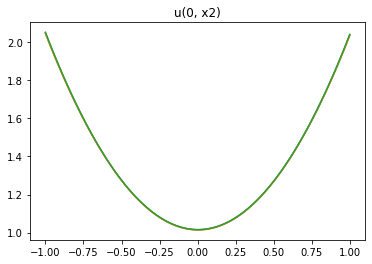

In [403]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)

plt.plot(x, nu(0, x,np.array(QT)))
plt.plot(x, nu_min(0, x,np.array(QT)))
plt.plot(x, nu_max(0, x,np.array(QT)))
plt.title('u(0, x2)')
plt.show()

#### 6) Построить график прогнозных значений и доверительной полосы для математического ожидания функции отклика и для самого отклика.

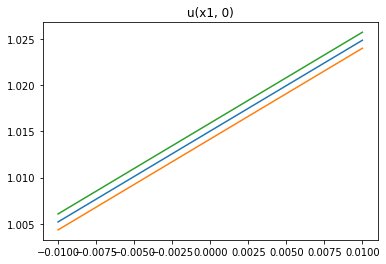

In [406]:
fig = plt.subplots()
x = np.linspace(-0.01, 0.01,100)

plt.plot(x, nu(x, 0,np.array(QT)))
plt.plot(x, nu_min(x, 0,np.array(QT)))
plt.plot(x, nu_max(x, 0,np.array(QT)))
plt.title('u(x1, 0)')
plt.show()

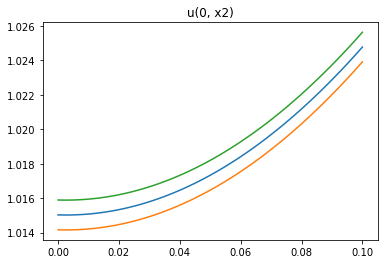

In [408]:
fig = plt.subplots()
x = np.linspace(-0.0, 0.1,100)

plt.plot(x, nu(0, x,np.array(QT)))
plt.plot(x, nu_min(0, x,np.array(QT)))
plt.plot(x, nu_max(0, x,np.array(QT)))
plt.title('u(0, x2)')
plt.show()

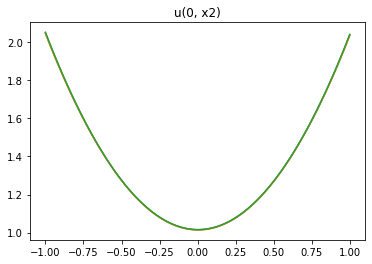

In [409]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)

plt.plot(x, nu(0, x,np.array(QT)))
plt.plot(x, nu_min(0, x,np.array(QT)))
plt.plot(x, nu_max(0, x,np.array(QT)))
plt.title('u(0, x2)')
plt.show()

#### 7) Заново смоделировать исходные данные (см. лаб. работу № 1), увеличив мощность случайной помехи до 50…70 % от мощности полезного сигнала и провести оценку параметров. Повторить пункты 3, 4 с новыми данными.

In [338]:
#Мощность помехи — 70%

In [368]:
def l2_2(sigma, f, Q, u):
    mean = df.y.mean()
    w2 = np.dot(vec_u - mean, vec_u - mean)/(len(vec_u) - 1)
    p = 0.1
    sigma = (p*w2)**0.5
    sigma
    for i in range(len(df['u'])):
        df['u'][i] = u(df['x1'][i], df['x2'][i])
    def ff(x,u):
        return -u(x[0],x[1])
    bnds = ((-1,1), (-1, 1))
    maxx = scipy.optimize.minimize(ff, [0, 0] ,u, method='SLSQP', bounds=bnds)
    maxx = -maxx.fun
    y = []
    for i in range(len(df['u'])):
        y.append(df["u"][i] + random.choice([-1,1])*0.5*maxx )
        df['y'][i] = y[i]
        
    X = []
    for i in range(len(Q)):
        X.append([])
        for j in range(len(df['u'])):
            X[i].append(f(df['x1'][j],df['x2'][j])[i])
    X = np.matrix(X)
    Q1 = X.dot(X.T)
    Q1 = np.linalg.inv(Q1)
    Q1 = Q1.dot(X)
    Q1 = Q1 * np.matrix(y).T
    e = []
    e = y - (X.T).dot(np.matrix(Q).T).T
    sigma2 = float(e.dot(e.T)/(len(df["u"])-len(Q)))
    F = sigma2/sigma**2
    print(sigma**2)
    return Q1, sigma2, F, X 

In [369]:
QT, sigma2, F, X = l2_2(sigma,f,Q,u)
print(QT, sigma2, F)
X.shape

0.04985754719533813
[[1.09051514]
 [0.66555734]
 [0.00383254]
 [0.70775215]
 [0.31668655]
 [0.98191557]] 4.297978723388526 86.20517785500694


(6, 100)

In [370]:
#Модель неадекватная т.к. F > 1.23

In [373]:
#Проверка гипотезы о незначимости каждого параметра
F=[]
for j in range(len(Q)):
    F.append(float(QT[j][0])**2/(sigma2*djj[j]))
    if F[j]<3.92:
        print('Принимается')
    else:
        print('Отвергается')
print(F)

Отвергается
Принимается
Принимается
Принимается
Принимается
Принимается
[8.057120185349575, 3.3769789374651245, 2.9846238459340258e-05, 0.841732982857321, 0.6940724724854072, 2.171960737445131]


In [372]:
#Проверка гипотезы о значимости самой регрессии
RSS=(np.array(df.y)-X.T.dot(QT).T)
RSS=float(RSS.dot(RSS.T))
RSSh=0
for i in range(len(df.y)):
    RSSh+=(df.y[i]-np.mean(df.u))**2
m=6
n=100
q=m-1
F=((RSSh-RSS)/q)/(RSS/(n-m))
print(F)

1.349354148137747


In [346]:
#F=1.34 < F(5,94) = 2.2899
# гипотеза о незначимости регрессии принимается